# Task 04 - US Traffic Accident Analysis (SkillCraft Internship)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
sns.set(style='darkgrid')

In [2]:
# Load only a portion of the data (100,000 rows)
df = pd.read_csv('US_Accidents_March23.csv', nrows=100000)
df.shape

(100000, 46)

In [3]:
print(df.columns.tolist())

['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [4]:
# Select and preprocess relevant columns
columns_to_keep = ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
df = df[columns_to_keep]
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df.dropna(subset=['Start_Lat', 'Start_Lng'], inplace=True)

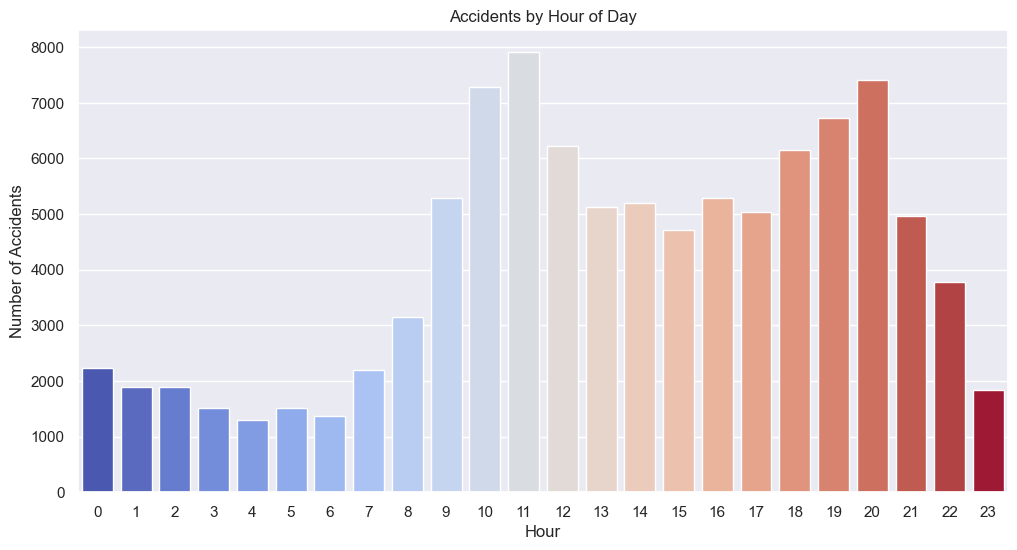

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df, hue='Hour', palette='coolwarm', legend=False)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()


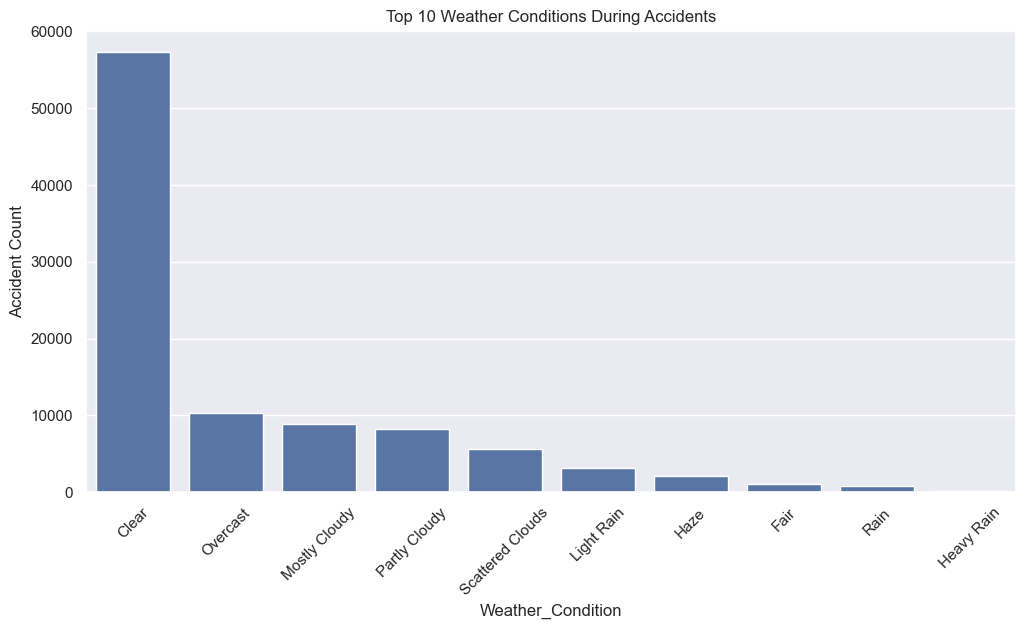

In [6]:
# Top 10 Weather Conditions
top_weather = df['Weather_Condition'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_weather.index, y=top_weather.values)
plt.title('Top 10 Weather Conditions During Accidents')
plt.xticks(rotation=45)
plt.ylabel('Accident Count')
plt.show()

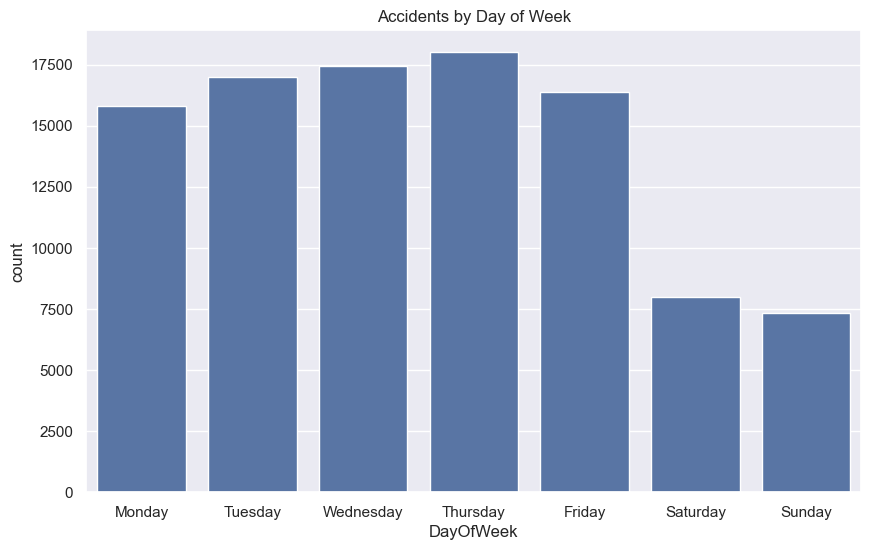

In [7]:
# Accidents by Day of Week
plt.figure(figsize=(10,6))
sns.countplot(x='DayOfWeek', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Accidents by Day of Week')
plt.show()

In [8]:
# Heatmap of Accident Hotspots
sample_df = df[['Start_Lat', 'Start_Lng']].sample(n=3000)
m = folium.Map(location=[sample_df['Start_Lat'].mean(), sample_df['Start_Lng'].mean()], zoom_start=5)
HeatMap(data=sample_df[['Start_Lat', 'Start_Lng']], radius=8).add_to(m)
m